In [1]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)

In [3]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())


['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:XLA_GPU:1']


In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Attention,MaxPool1D,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_self_attention import SeqSelfAttention

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [12]:
def encode_identity_block(n_step=784,lr = 3e-4, drop_frac=0, l1_norm  = 0):
    
    X_input = layers.Input(shape=(n_step,1))
    X = X_input
    X = layers.Dense(24,activation='relu',name= 'encoder_dense')(X)
   # X = layers.add([X, X_shortcut])
    X = layers.BatchNormalization(axis=1)(X)
    X = layers.Activation('relu')(X) 
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')
    return model


In [13]:
encoderlayer = encode_identity_block()

In [14]:
encoderlayer.summary()

Model: "ResNet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
encoder_dense (Dense)        (None, 784, 24)           48        
_________________________________________________________________
batch_normalization_2 (Batch (None, 784, 24)           3136      
_________________________________________________________________
activation_2 (Activation)    (None, 784, 24)           0         
Total params: 3,184
Trainable params: 1,616
Non-trainable params: 1,568
_________________________________________________________________


In [42]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320

In [125]:
layer_name = 'dense_56'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test_3d)

UnimplementedError:  The Conv2D op currently only supports the NHWC tensor format on the CPU. The op was given the format: NCHW
	 [[node model_20/conv1d_75/conv1d (defined at <ipython-input-125-da0ef010bc0d>:4) ]] [Op:__inference_distributed_function_98452]

Function call stack:
distributed_function


In [34]:
intermediate_output.shape

(10000, 128)

In [48]:
autoencoder.get_layer('dense_27').get_weights()[0].shape

(32, 16)

In [43]:
autoencoder.layers('dense_27')

TypeError: 'list' object is not callable

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)

decoded = Dense(64, activation='relu')(embedding)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [36]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0536 - val_loss: 0.0371
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0327 - val_loss: 0.0292
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0277 - val_loss: 0.0260
Epoch 4/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0254 - val_loss: 0.0242
Epoch 5/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0241 - val_loss: 0.0234
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0233 - val_loss: 0.0229
Epoch 7/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0227 - val_loss: 0.0222
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0222 - val_loss: 0.0217
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0218 - val_

In [38]:
decoded_imgs = autoencoder.predict(x_test)

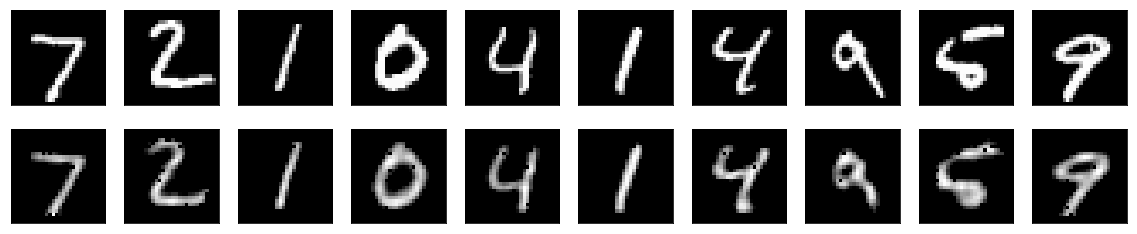

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

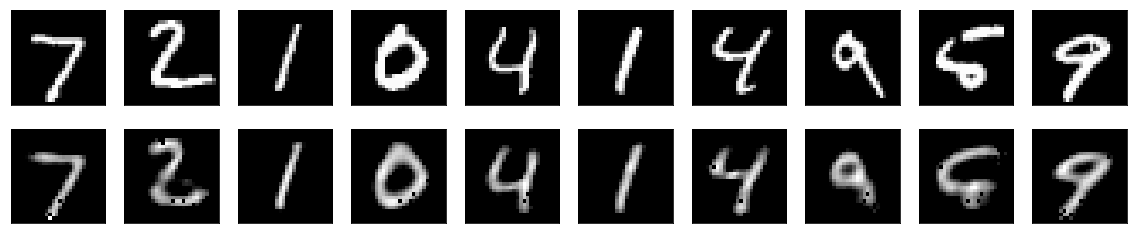

In [39]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
input_img = Input(shape=(784,1))
encoded = Dense(256, activation='relu')(input_img)
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(32, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)

encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(64)(embedding)

decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(repeat)
decoded = Conv1D(128, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)

decoded = Dense(1,activation='linear')(decoded)

In [16]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
dense_9 (Dense)              (None, 784, 256)          512       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 128, 128)          200832    
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 64, 64)            16448     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 32, 32)            4128      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528 

In [9]:
x_train.shape

(60000, 784)

In [10]:
x_train_3d = np.atleast_3d(x_train)
x_test_3d = np.atleast_3d(x_test)

In [11]:
x_train_3d.shape


(60000, 784, 1)

In [12]:
autoencoder.fit(x_train_3d, x_train_3d,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_3d, x_test_3d))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
  256/60000 [..............................] - ETA: 4:08

InvalidArgumentError:  Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[node Conv2DBackpropFilter (defined at <ipython-input-12-f6f066380807>:5) ]] [Op:__inference_distributed_function_2050]

Function call stack:
distributed_function


In [ ]:
decoded_imgs = autoencoder.predict(x_test_3d)

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_3d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()